<a href="https://colab.research.google.com/github/galileo15640215/data_analysis/blob/master/kernel_density_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
dataset = randn(25)

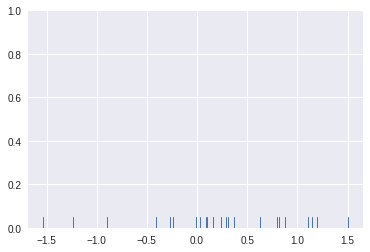

In [4]:
sns.rugplot(dataset)

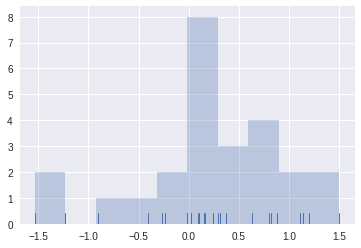

In [5]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

(0, 1)

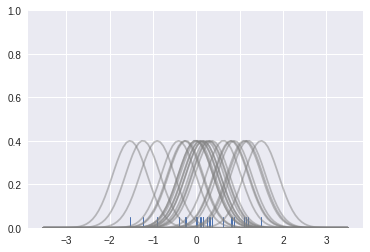

In [8]:
sns.rugplot(dataset)

x_min = dataset.min() -2
x_max = dataset.max() + 2
x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**0.2

kernel_list = []
for data_point in dataset:
  kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
  kernel_list.append(kernel)
  
  kernel = kernel / kernel.max()
  kernel = kernel * 0.4
  plt.plot(x_axis, kernel, color = 'gray', alpha=0.5)
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

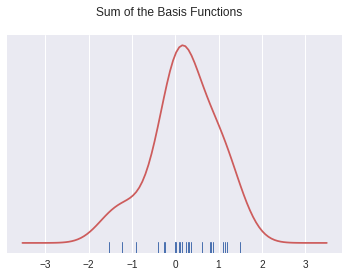

In [11]:
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle('Sum of the Basis Functions')

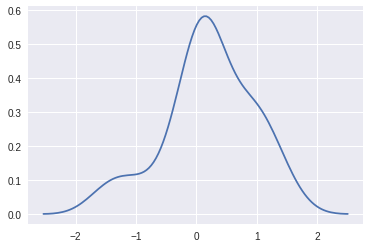

In [12]:
sns.kdeplot(dataset)

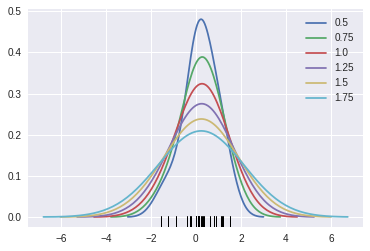

In [16]:
sns.rugplot(dataset, color='black')
for bw in np.arange(0.5,2,0.25):
  sns.kdeplot(dataset, bw=bw, label=bw)

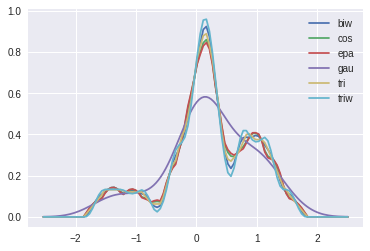

In [17]:
kernel_options = ['biw','cos','epa','gau','tri','triw']
for kern in kernel_options:
  sns.kdeplot(dataset, kernel=kern, label=kern)

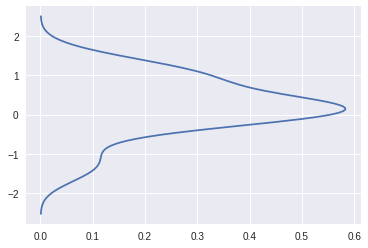

In [18]:
sns.kdeplot(dataset, vertical=True)

(array([ 2.,  2.,  3.,  4.,  6., 14., 17., 21., 23., 25.]),
 array([-1.53187283, -1.2284464 , -0.92501997, -0.62159354, -0.31816711,
        -0.01474068,  0.28868575,  0.59211218,  0.89553861,  1.19896505,
         1.50239148]),
 <a list of 10 Patch objects>)

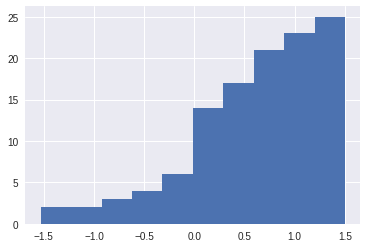

In [19]:
plt.hist(dataset, cumulative=True)

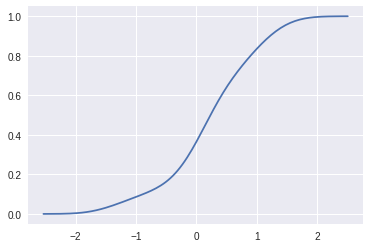

In [20]:
sns.kdeplot(dataset, cumulative=True)

In [0]:
mean=[0,0]
cov=[[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean, cov, 1000)

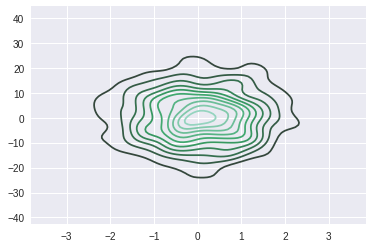

In [22]:
dframe = pd.DataFrame(dataset2, columns=['X','Y'])
sns.kdeplot(dframe)

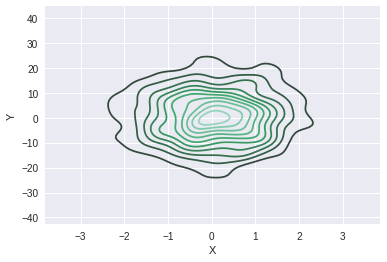

In [23]:
sns.kdeplot(dframe.X, dframe.Y)

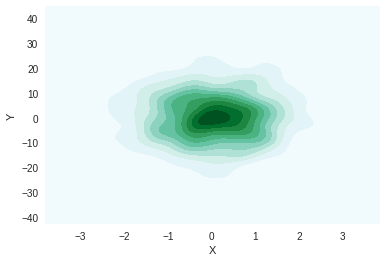

In [24]:
sns.kdeplot(dframe.X, dframe.Y, shade=True)

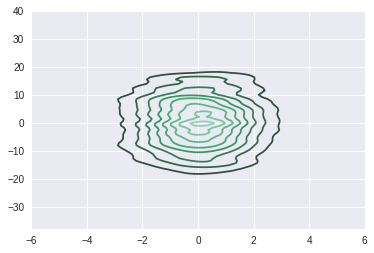

In [26]:
sns.kdeplot(dframe, bw=1)

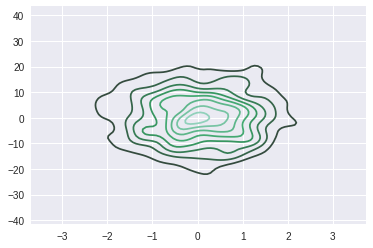

In [27]:
sns.kdeplot(dframe, bw='silverman')

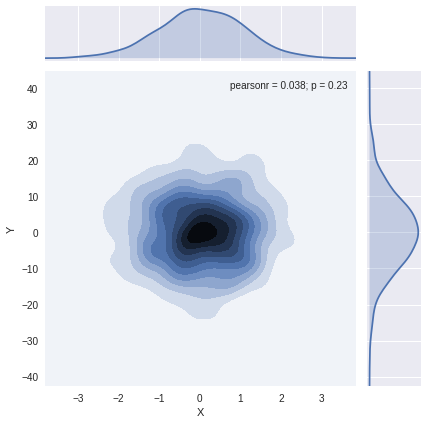

In [28]:
sns.jointplot('X','Y', dframe, kind='kde')